# Declare and read data

In [3]:
import chardet
with open('healthcare_dataset.csv', 'rb') as f:
    df=chardet.detect(f.read(10000))
    print(df)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
import pandas as pd
df=pd.read_csv('healthcare_dataset.csv', encoding='ascii')

# EDA

## Basic EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo:')
    print(df.info())
    print('\nDescribe:')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ', df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ', df.nunique())
    dups=df.duplicated()
    print('\nDuplicate Rows: ', df[dups])
    plt.figure(figsize=(10, 12))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

A overview about the healthcare dataset:

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: fl

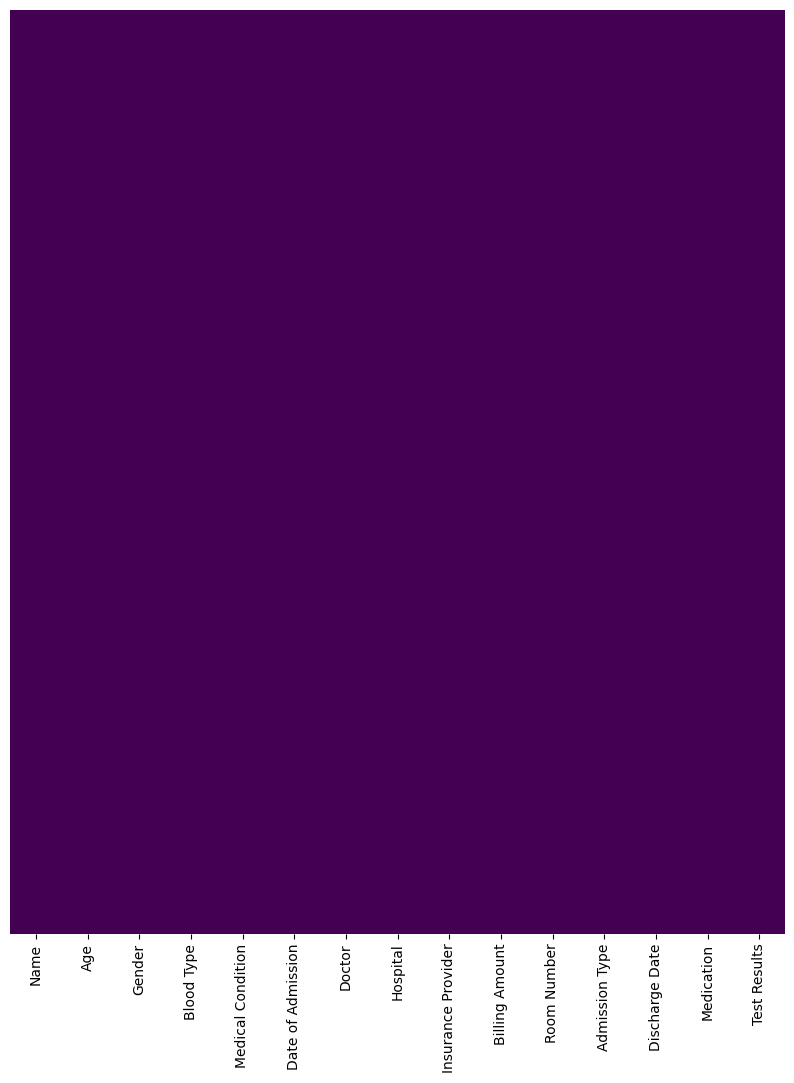

In [8]:
dataoverview(df, 'A overview about the healthcare dataset')

## Clean Data

In [10]:
df['Name'] = df['Name'].str.lower().str.title()

## Save Data

In [12]:
df.to_csv('healthcare_dataset.csv', index=False)

## Plot charts to understand the data

In [14]:
def eda_data(df):
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      +df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

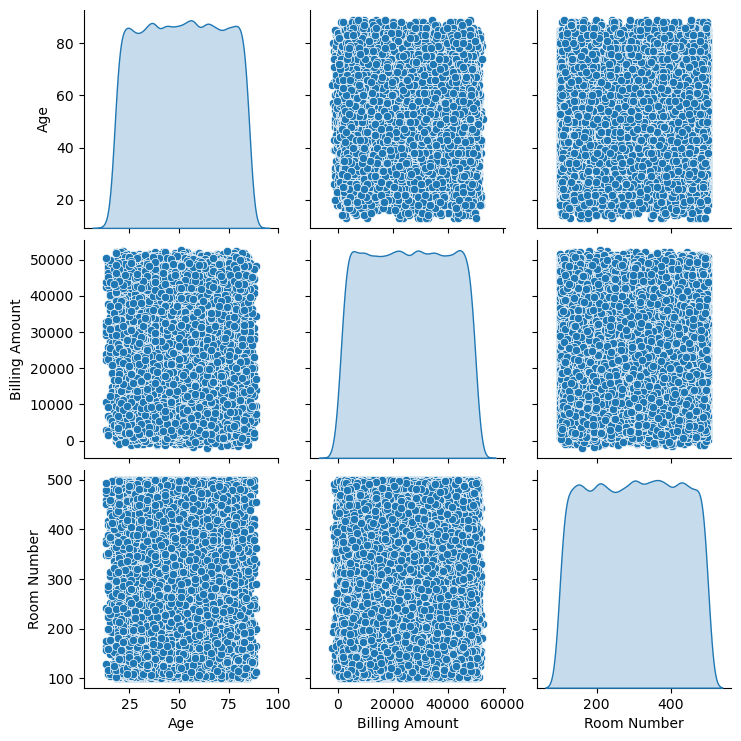

In [15]:
eda_data(df)

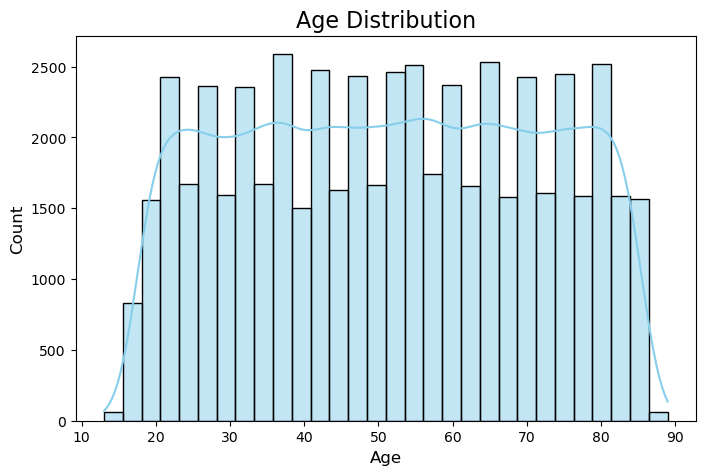

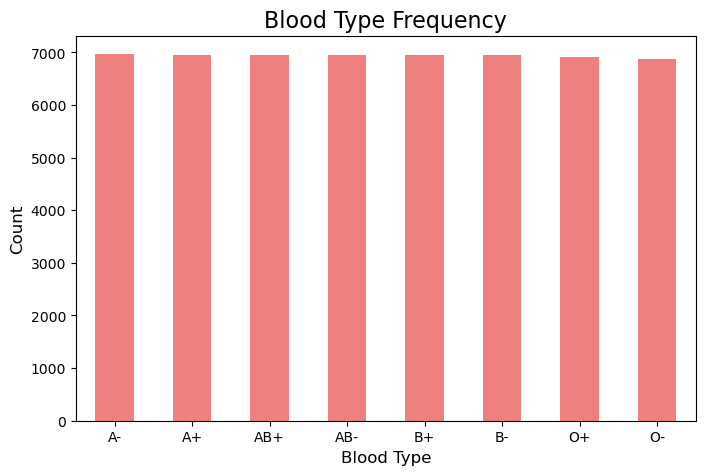

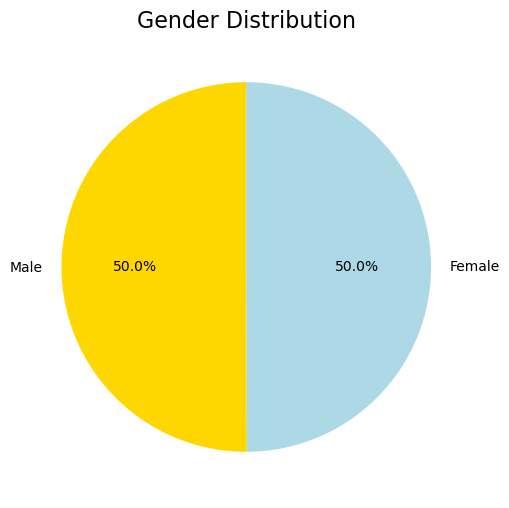

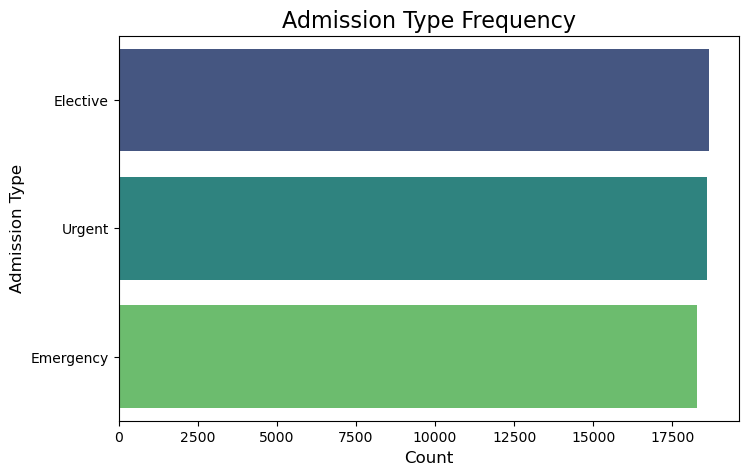

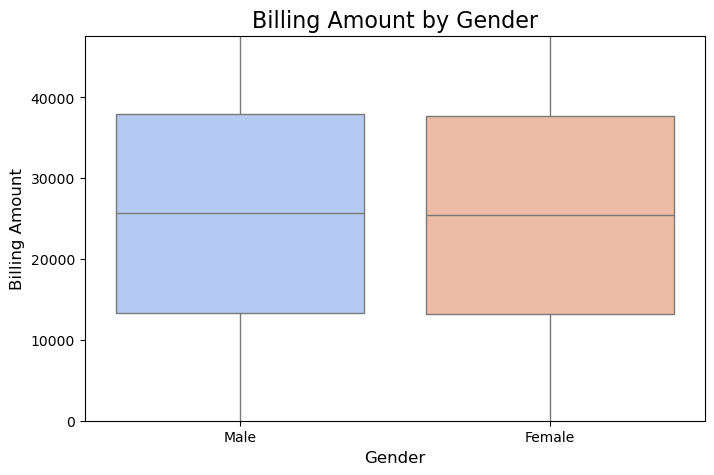

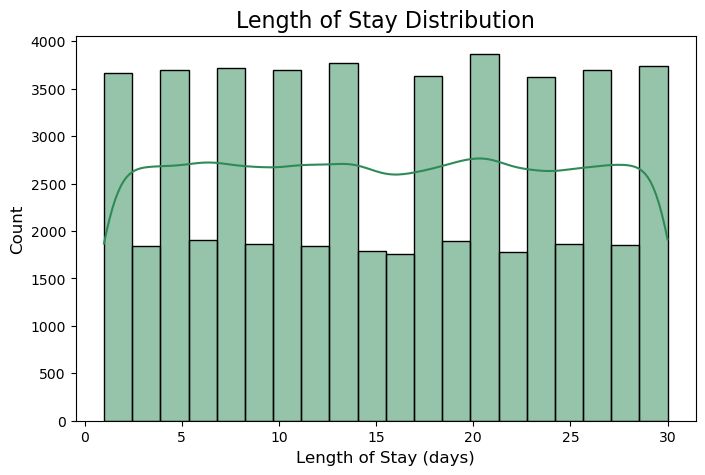

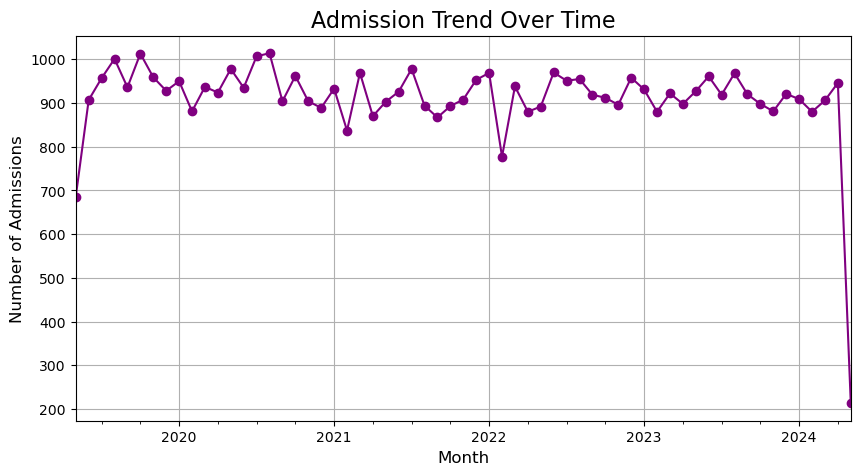

In [16]:
import warnings
warnings.filterwarnings('ignore')

data = df.copy()

# Convert date columns to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Create a new column: Length of Stay
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

# -------- 1. Age Distribution Plot ---------
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# -------- 2. Blood Type Frequency Plot ---------
plt.figure(figsize=(8, 5))
data['Blood Type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Blood Type Frequency', fontsize=16)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# -------- 3. Gender Distribution ---------
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue'], startangle=90)
plt.title('Gender Distribution', fontsize=16)
plt.ylabel('')
plt.show()

# -------- 4. Admission Type Frequency Plot ---------
plt.figure(figsize=(8, 5))
sns.countplot(y='Admission Type', data=data, palette='viridis', order=data['Admission Type'].value_counts().index)
plt.title('Admission Type Frequency', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Admission Type', fontsize=12)
plt.show()

# -------- 5. Billing Amount by Gender ---------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Billing Amount', data=data, palette='coolwarm')
plt.title('Billing Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Billing Amount', fontsize=12)
plt.ylim(0, data['Billing Amount'].quantile(0.95))  # Limit to avoid outliers
plt.show()

# -------- 6. Length of Stay Distribution ---------
plt.figure(figsize=(8, 5))
sns.histplot(data['Length of Stay'].dropna(), bins=20, kde=True, color='seagreen')
plt.title('Length of Stay Distribution', fontsize=16)
plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# -------- 7. Admission Trend Over Time ---------
data['Admission Month'] = data['Date of Admission'].dt.to_period('M')
admission_trend = data['Admission Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
admission_trend.plot(kind='line', marker='o', color='purple')
plt.title('Admission Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.grid(True)
plt.show()
